In [1]:
## importing necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Sales Forecasting

In [ ]:
df2=pd.read_excel('data_for_forecasting.xlsx', index_col=0)

forcasting for loyal customers. Segment = 3

In [117]:
df3=df2.loc[df2['Segment']==3]
df3.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation Flag,Net Sales,Segment,Year
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078,United Kingdom,0,59.50,3,2009
13,489436,21755,LOVE BUILDING BLOCK WORD,18,2009-12-01 09:06:00,5.45,13078,United Kingdom,0,98.10,3,2009
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078,United Kingdom,0,17.85,3,2009
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078,United Kingdom,0,27.04,3,2009
16,489436,22119,PEACE WOODEN BLOCK LETTERS,3,2009-12-01 09:06:00,6.95,13078,United Kingdom,0,20.85,3,2009


In [145]:
#df['Year'] = df['InvoiceDate'].dt.year
df3['Month'] = df3['InvoiceDate'].dt.month
df3['Day'] = df3['InvoiceDate'].dt.day
df3['Week_Number'] = df3['InvoiceDate'].dt.week
#df3['Weekday'] = df3['InvoiceDate'].dt.weekday
df3['Day_of_Week'] = df3['InvoiceDate'].dt.weekday
#df3['Weekend'] = df3.Day_of_Week.isin([5, 6]).astype(int)

In [272]:
df3.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Cancellation Flag,Net Sales,Segment,Year,Month,Day,Week_Number,Day_of_Week,Weekend
1067350,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,0,23.4,3,2011,12,9,49,4,0
1067351,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,0,23.6,3,2011,12,9,49,4,0
1067352,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,0,30.0,3,2011,12,9,49,4,0
1067353,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,0,214.8,3,2011,12,9,49,4,0
1067354,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113,United Kingdom,0,70.8,3,2011,12,9,49,4,0


In [120]:
df3.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Cancellation Flag', 'Net Sales',
       'Segment', 'Year', 'Month', 'Day', 'Week_Number', 'Day_of_Week',
       'Weekend'],
      dtype='object')

In [147]:
df3=df3.loc[df3['Cancellation Flag']==0]

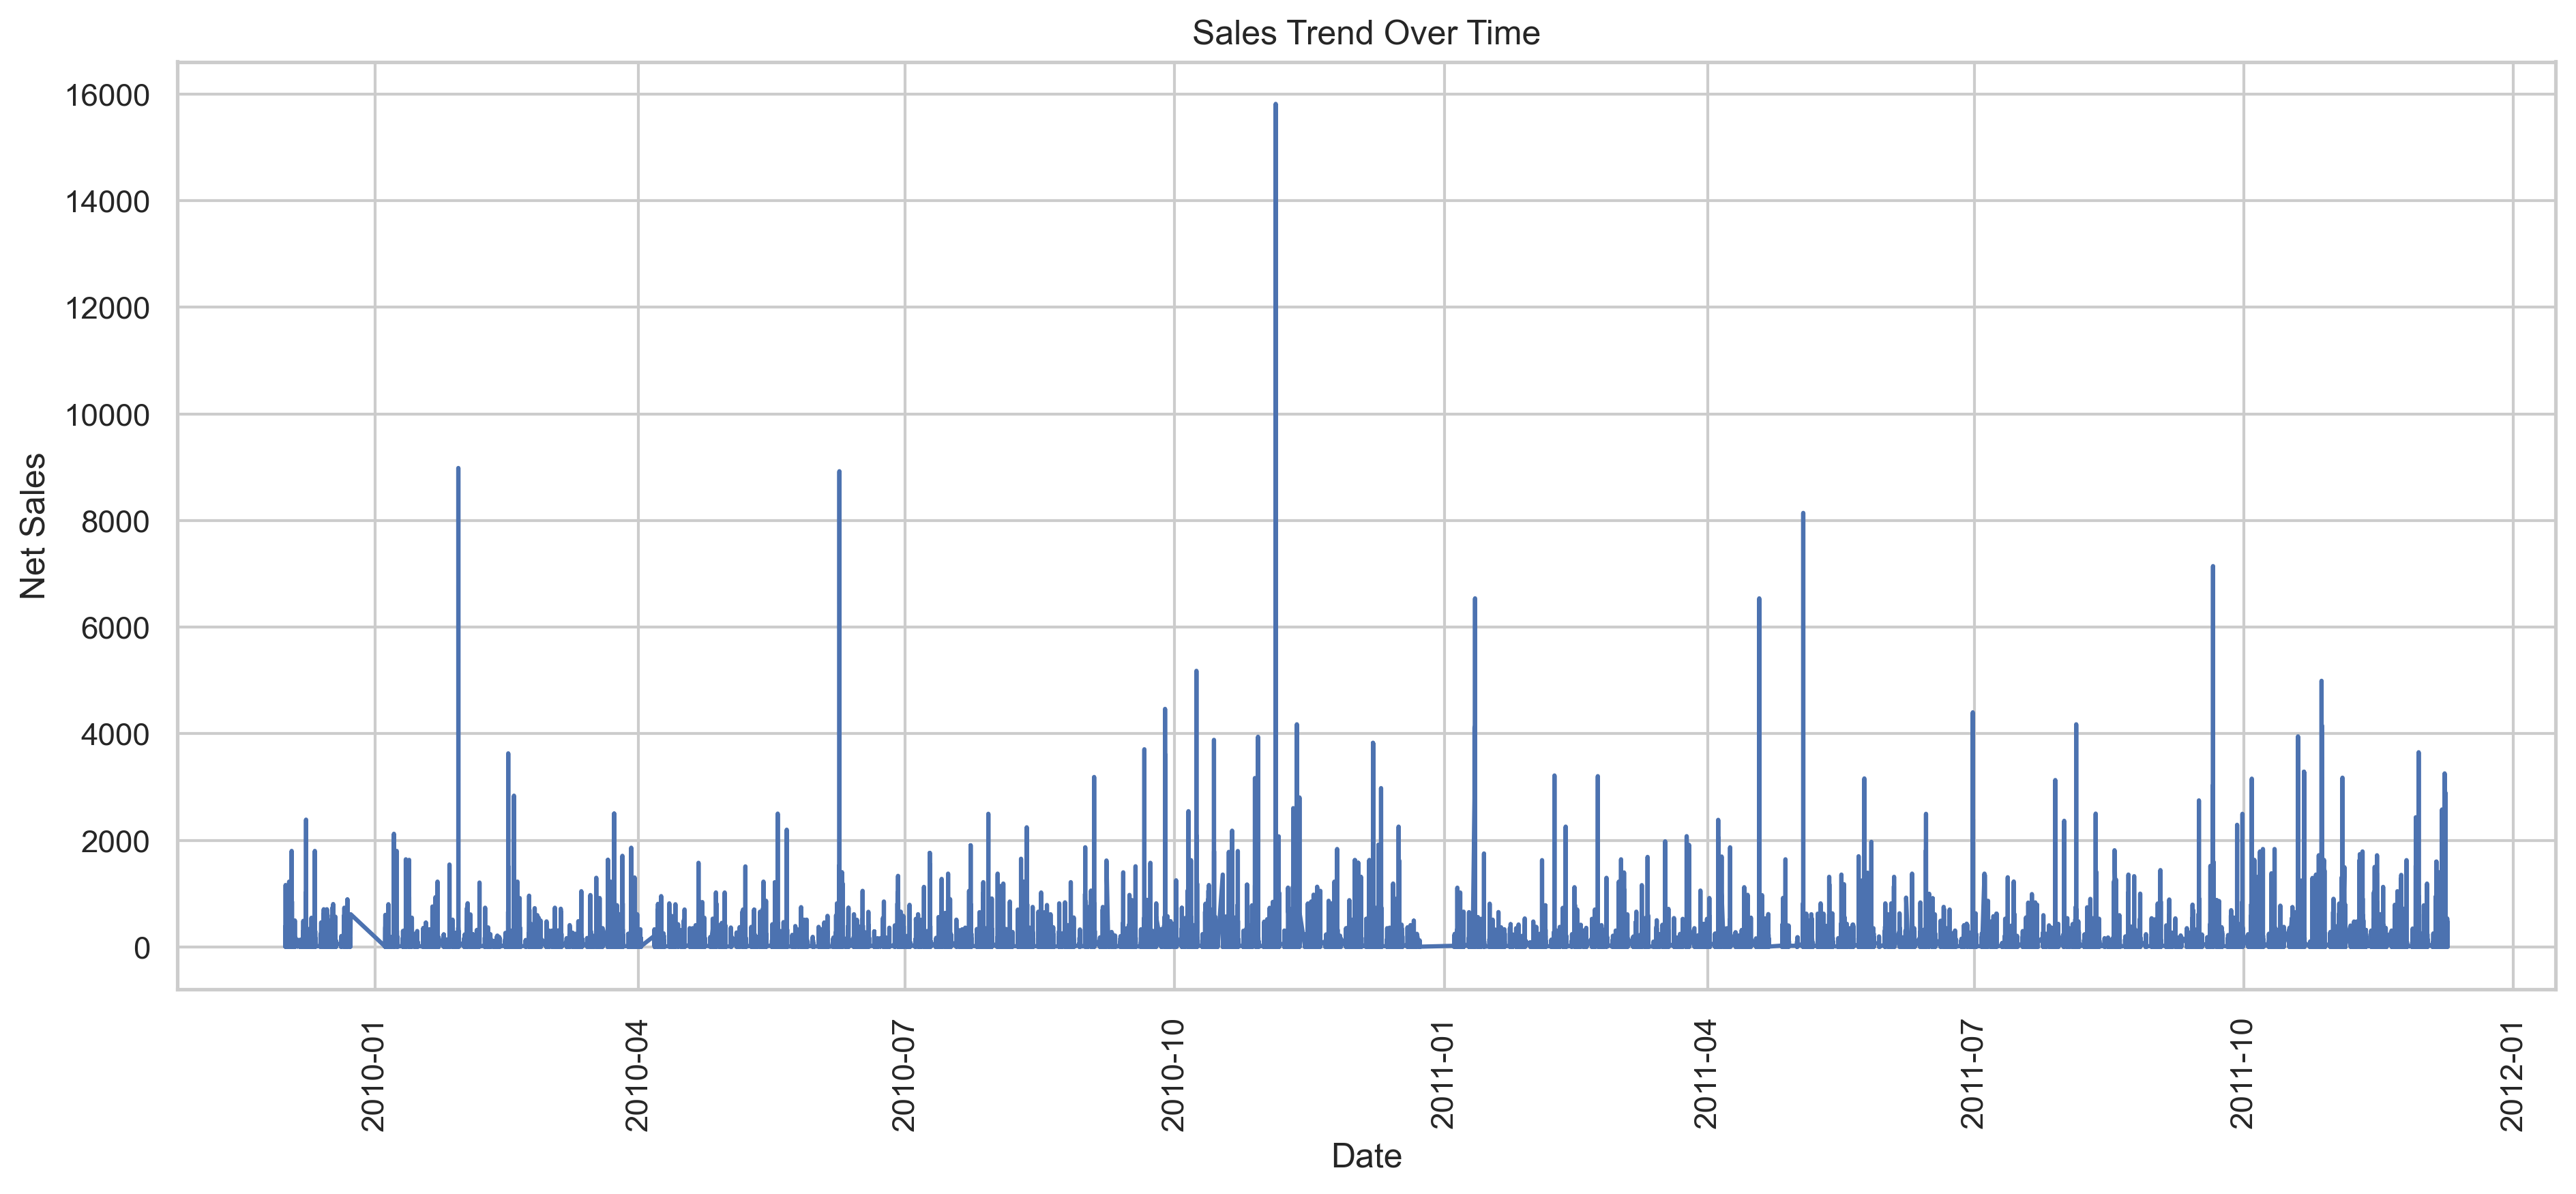

In [124]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6), dpi=300)

# Plot the sales trend over time
ax.plot(df3['InvoiceDate'], df3['Net Sales'], linestyle='-')
ax.set_title('Sales Trend Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Net Sales')
ax.grid(True)
plt.xticks(rotation=90)

# Show the plot
plt.show()


D:\Programs\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


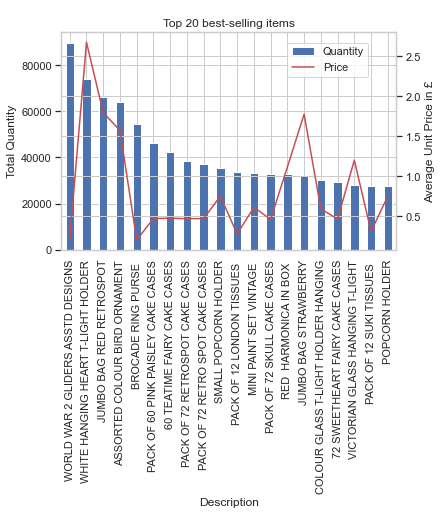

In [134]:
#Top 20 best-selling items
##fig, ax1 = plt.subplots(1, 1, figsize=(8,8))
Top20 = df3.groupby('Description',as_index=False)['Quantity','Net Sales'].sum().sort_values(by='Quantity',ascending=False).head(20)
Top20['Price'] = Top20['Net Sales']/Top20.Quantity
#Plot
ax = Top20.plot(x='Description', y='Quantity', legend=False,kind='bar')
ax1 = ax.twinx()
Top20.plot(x='Description', y='Price', ax=ax1, legend=False, color='r')
ax.figure.legend(loc=(.65,.85))
plt.title('Top 20 best-selling items')
ax.set_ylabel('Total Quantity')
ax1.set_ylabel('Average Unit Price in £')
plt.show()

#### XGBoost

In [273]:
df3.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Cancellation Flag', 'Net Sales',
       'Segment', 'Year', 'Month', 'Day', 'Week_Number', 'Day_of_Week',
       'Weekend'],
      dtype='object')

In [290]:
cols=['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Net Sales']
df4=df3[cols]

In [291]:
df4.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Net Sales
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078,United Kingdom,59.50
13,489436,21755,LOVE BUILDING BLOCK WORD,18,2009-12-01 09:06:00,5.45,13078,United Kingdom,98.10
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12-01 09:06:00,5.95,13078,United Kingdom,17.85
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12-01 09:06:00,1.69,13078,United Kingdom,27.04
16,489436,22119,PEACE WOODEN BLOCK LETTERS,3,2009-12-01 09:06:00,6.95,13078,United Kingdom,20.85


In [276]:
def monthly_sales(data):
    data = data.copy()
    # Drop the day indicator from the date column
    data.date = data.date.apply(lambda x: str(x)[:-9])
    # Sum sales per month
    data = data.groupby('date')['sales'].sum().reset_index()
    data.date = pd.to_datetime(data.date)
    data.to_csv('../data/monthly_data.csv')
    return data

In [292]:
df4.InvoiceDate=df4.InvoiceDate.apply(lambda x: str(x)[:-12])

D:\Programs\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [295]:
df4.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Net Sales
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12,5.95,13078,United Kingdom,59.50
13,489436,21755,LOVE BUILDING BLOCK WORD,18,2009-12,5.45,13078,United Kingdom,98.10
14,489436,21754,HOME BUILDING BLOCK WORD,3,2009-12,5.95,13078,United Kingdom,17.85
15,489436,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2009-12,1.69,13078,United Kingdom,27.04
16,489436,22119,PEACE WOODEN BLOCK LETTERS,3,2009-12,6.95,13078,United Kingdom,20.85


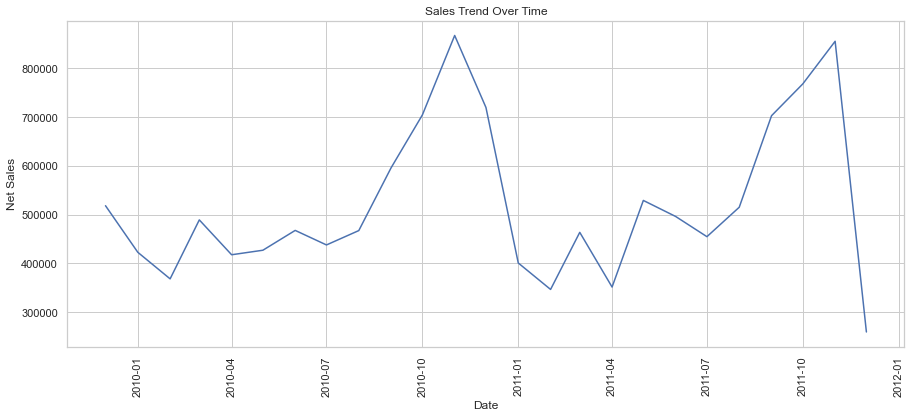

In [297]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Plot the sales trend over time
ax.plot(df5['InvoiceDate'], df5['Net Sales'], linestyle='-')
ax.set_title('Sales Trend Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Net Sales')
ax.grid(True)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [394]:
df5=df4.groupby('InvoiceDate')['Net Sales'].sum().reset_index()
df5.InvoiceDate=pd.to_datetime(df5.InvoiceDate)

In [395]:
df5.head()

,InvoiceDate,Net Sales
0,2009-12-01,518185.690
1,2010-01-01,422628.181
2,2010-02-01,368133.922
3,2010-03-01,489076.681
4,2010-04-01,417598.510


In [498]:
def generate_supervised(data):
    supervised_df = data.copy()
    #create column for each lag
    for i in range(1,9):
        col = 'lag_' + str(i)
        supervised_df[col] = supervised_df['Net Sales'].shift(i)
    #drop null values
    supervised_df = supervised_df.dropna().reset_index(drop=True)
    return supervised_df



In [499]:
model_df = generate_supervised(df5)

In [500]:
model_df['InvoiceDate'].min(), model_df['InvoiceDate'].max()

(Timestamp('2010-08-01 00:00:00'), Timestamp('2011-12-01 00:00:00'))

In [501]:
model_df.head(10)

,InvoiceDate,Net Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8
0,2010-08-01,467169.140,437711.800,467526.500,426865.290,417598.510,489076.681,368133.922,422628.181,518185.690
1,2010-09-01,595969.430,467169.140,437711.800,467526.500,426865.290,417598.510,489076.681,368133.922,422628.181
2,2010-10-01,704327.700,595969.430,467169.140,437711.800,467526.500,426865.290,417598.510,489076.681,368133.922
3,2010-11-01,867384.702,704327.700,595969.430,467169.140,437711.800,467526.500,426865.290,417598.510,489076.681
4,2010-12-01,719691.300,867384.702,704327.700,595969.430,467169.140,437711.800,467526.500,426865.290,417598.510
5,2011-01-01,400717.130,719691.300,867384.702,704327.700,595969.430,467169.140,437711.800,467526.500,426865.290
6,2011-02-01,346443.920,400717.130,719691.300,867384.702,704327.700,595969.430,467169.140,437711.800,467526.500
7,2011-03-01,463548.980,346443.920,400717.130,719691.300,867384.702,704327.700,595969.430,467169.140,437711.800
8,2011-04-01,351353.441,463548.980,346443.920,400717.130,719691.300,867384.702,704327.700,595969.430,467169.140
9,2011-05-01,528991.880,351353.441,463548.980,346443.920,400717.130,719691.300,867384.702,704327.700,595969.430


In [502]:
data = model_df.drop(['InvoiceDate'], axis=1).iloc[0:-1]

In [503]:
data.tail()

,Net Sales,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8
11,454675.48,496096.53,528991.88,351353.441,463548.980,346443.920,400717.130,719691.300,867384.702
12,515039.62,454675.48,496096.53,528991.880,351353.441,463548.980,346443.920,400717.130,719691.300
13,702826.62,515039.62,454675.48,496096.530,528991.880,351353.441,463548.980,346443.920,400717.130
14,768085.72,702826.62,515039.62,454675.480,496096.530,528991.880,351353.441,463548.980,346443.920
15,855464.97,768085.72,702826.62,515039.620,454675.480,496096.530,528991.880,351353.441,463548.980


In [504]:
X_train, X_test, y_train, y_test = data.drop(['Net Sales'], axis=1)[0:-3].values, data.drop(['Net Sales'], axis=1)[-3:].values, data['Net Sales'][0:-3].values, data['Net Sales'][-3:].values

In [505]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

In [506]:
np.shape(X_test_scaled)

(3, 8)

In [507]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Initialize and train the XGBoost Regressor
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.2, random_state=0)
xgb_regressor.fit(X_train_scaled, y_train)

# Make predictions with the XGBoost model
xgb_predictions = xgb_regressor.predict(X_test_scaled)

# Calculate metrics for XGBoost
xgb_rmse = math.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

[09:58:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [508]:
xgb_predictions

array([595963.6 , 736940.44, 867360.8 ], dtype=float32)

In [509]:
y_test

array([702826.62000001, 768085.72      , 855464.97      ])

In [510]:
print("\nXGBoost:")
print("RMSE:", xgb_rmse)
print("MAE:", xgb_mae)



XGBoost:
RMSE: 64630.33186556924
MAE: 49968.0400000012


In [470]:
# Initialize and train the XGBoost Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=20)
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions with the XGBoost model
rf_predictions = rf_regressor.predict(X_test_scaled)

# Calculate metrics for XGBoost
rf_rmse = math.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [471]:
rf_predictions

array([607235.3567    , 676662.89660999, 594056.76123999])

In [472]:
print("\nRandom Forest:")
print("RMSE:", rf_rmse)
print("MAE:", rf_mae)



Random Forest:
RMSE: 169144.98106950612
MAE: 149474.09848334288


In [417]:
df5[4:-3]

,InvoiceDate,Net Sales
4,2010-04-01,417598.510
5,2010-05-01,426865.290
6,2010-06-01,467526.500
7,2010-07-01,437711.800
8,2010-08-01,467169.140
9,2010-09-01,595969.430
10,2010-10-01,704327.700
11,2010-11-01,867384.702
12,2010-12-01,719691.300
13,2011-01-01,400717.130


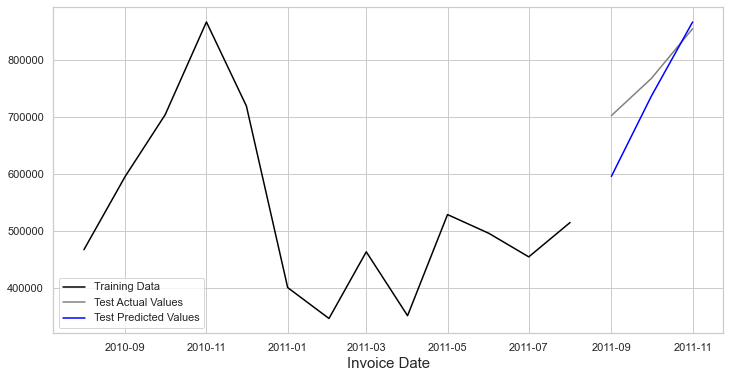

In [524]:
plt.figure(figsize=(12, 6))
plt.plot(df5['InvoiceDate'][8:-4].values, y_train, color='black', label='Training Data')
plt.plot(df5['InvoiceDate'][-4:-1].values, y_test, color='grey', label='Test Actual Values')
plt.plot(df5['InvoiceDate'][-4:-1].values, xgb_predictions, color='blue', label='Test Predicted Values')
plt.xlabel('Invoice Date', fontsize=15)
plt.legend()